# Freeswitch Audio Recordings Traffic Analysis 

## Altanai Bisht 
( abisht@seattleu.import os 
os.environ['JAVA_HOME']="C:\\Users\\abisht\\.jdks\\corretto-11.0.15"
print(os.environ['JAVA_HOME'])m)

License GPL 3

In [1]:
import os 
os.environ['JAVA_HOME']="C:\\Users\\abisht\\.jdks\\corretto-11.0.15"
print(os.environ['JAVA_HOME'])

C:\Users\abisht\.jdks\corretto-11.0.15


In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\abisht\\Downloads\\spark-3.2.1-bin-hadoop3.2\\spark-3.2.1-bin-hadoop3.2'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics 
spark = SparkSession.builder.getOrCreate()

# Call Recorded Audio File 

- wav

In [5]:
import scipy
import os.path, time, datetime
import platform

In [6]:
audiopath= 'C:\\Users\\abisht\\VoIPCallLogs_BigDataSet\\audiofiles'

In [8]:
rdd =  os.listdir(audiopath)
# rdd.take(5)

AttributeError: 'list' object has no attribute 'take'

In [9]:
base_df = []
for file in os.listdir(audiopath):
    # base_df.append(datetime.datetime.fromtimestamp(os.stat(os.path.join(audiopath,file)).st_mtime).timestamp())
    base_df.append(datetime.datetime.fromtimestamp(os.stat(os.path.join(audiopath,file)).st_mtime))
base_df

[datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 33, 58),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 35, 58),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 37, 50),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 37, 23),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 38, 8),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 35, 40),
 datetime.datetime(2016, 2, 5, 6, 49, 25),
 datetime.datetime(2015, 6, 30, 22, 39, 29),
 datetime.datetime(2016, 2, 5, 6, 49, 26),
 datetime.datetime(2015, 6, 30, 22, 39, 51),
 datetime.datetime(2016, 2, 5, 6, 49, 26),
 datetime.datetime(2015, 6, 30, 22, 34, 7),
 datetime.datetime(2016, 2, 5, 6, 49, 26),
 datetime.datetime(2015, 6, 30, 22, 39, 25),
 datetime.datetime(2016, 2, 5, 6, 49, 26),
 datetime.datetime(2015, 6, 30, 22, 35, 44),
 datetime.datetime(2016, 2, 5, 6, 

In [10]:
# from pyspark import SparkFiles
# # base_df = spark.read.text(SparkFiles.get(audiopath))
# # base_df = SparkFiles.get(audiopath)
# base_df["start"] =  (datetime.datetime.fromtimestamp(os.stat(audiopath).st_mtime)
# base_df

In [11]:
# sample_logs = [item['value'] for item in base_df.take(15)]
# sample_logs

In [12]:
# # creation_date(audiopath)
# # print("Created: %s" % creation_date(audiopath))
# rtime = os.stat(audiopath).st_mtime
# print(rtime)
# print("Date created:",datetime.datetime.fromtimestamp(rtime))

In [13]:
# from pyspark.sql.functions import regexp_extract

# logs_df = base_df.select(datetime.datetime.fromtimestamp(os.stat(base_df).st_mtime).alias('timestamp'))
# logs_df.show(10, truncate=True)
# print((logs_df.count(), len(logs_df.columns)))

## Data Wrangling

In [14]:
# logs_df= pd.DataFrame(base_df)

In [15]:
# print((base_df.count(), len(base_df.columns)))

In [16]:
from pyspark.sql.functions import col
from pyspark.sql.types import TimestampType

logs_df = spark.createDataFrame(base_df,TimestampType())
logs_df = logs_df.select(col("value").alias("timestamp"))
logs_df.show()

+-------------------+
|          timestamp|
+-------------------+
|2016-02-05 06:49:25|
|2015-06-30 22:33:58|
|2016-02-05 06:49:25|
|2015-06-30 22:35:58|
|2016-02-05 06:49:25|
|2015-06-30 22:37:50|
|2016-02-05 06:49:25|
|2015-06-30 22:37:23|
|2016-02-05 06:49:25|
|2015-06-30 22:38:08|
|2016-02-05 06:49:25|
|2015-06-30 22:35:40|
|2016-02-05 06:49:25|
|2015-06-30 22:39:29|
|2016-02-05 06:49:26|
|2015-06-30 22:39:51|
|2016-02-05 06:49:26|
|2015-06-30 22:34:07|
|2016-02-05 06:49:26|
|2015-06-30 22:39:25|
+-------------------+
only showing top 20 rows



## Finding missing values, Drop or values outside of date range 

In [17]:
dates = ("2015-01-01",  "2022-12-31")
# bad_rows_df = logs_df['timestamp'].between(*dates).show(truncate=False)
useful_logs_df= logs_df.select(logs_df['timestamp'], logs_df['timestamp'].between(*dates))
useful_logs_df.count()

452

In [18]:
logs_df = useful_logs_df[useful_logs_df[1]=='true']
logs_df.orderBy("timestamp").show(10, truncate=True)

+-------------------+---------------------------------------------------------+
|          timestamp|((timestamp >= 2015-01-01) AND (timestamp <= 2022-12-31))|
+-------------------+---------------------------------------------------------+
|2015-06-30 22:33:41|                                                     true|
|2015-06-30 22:33:44|                                                     true|
|2015-06-30 22:33:47|                                                     true|
|2015-06-30 22:33:48|                                                     true|
|2015-06-30 22:33:51|                                                     true|
|2015-06-30 22:33:52|                                                     true|
|2015-06-30 22:33:55|                                                     true|
|2015-06-30 22:33:56|                                                     true|
|2015-06-30 22:33:57|                                                     true|
|2015-06-30 22:33:57|                   

## RDD row to spark dataframe

In [19]:
from pyspark.sql import Row

new_rdd = useful_logs_df.rdd
parsed_rdd = new_rdd.map(lambda r : Row(\
                                        startTime =r[0],\
                                        endTime=r[0],\
                                        calluuid=r[0]))
df2 = spark.createDataFrame(parsed_rdd)
df2.printSchema()

root
 |-- startTime: timestamp (nullable = true)
 |-- endTime: timestamp (nullable = true)
 |-- calluuid: timestamp (nullable = true)



In [20]:
df2.show(1, vertical=True)

-RECORD 0------------------------
 startTime | 2016-02-05 06:49:25 
 endTime   | 2016-02-05 06:49:25 
 calluuid  | 2016-02-05 06:49:25 
only showing top 1 row



### Daily - Request reponse network traffic 

In [21]:
from pyspark.sql import functions as F

# find the day of the month
daily_traffic_df = df2.select(df2['startTime'], F.dayofmonth('startTime').alias('day'))
daily_traffic_df.show(5, truncate=False)

+-------------------+---+
|startTime          |day|
+-------------------+---+
|2016-02-05 06:49:25|5  |
|2015-06-30 22:33:58|30 |
|2016-02-05 06:49:25|5  |
|2015-06-30 22:35:58|30 |
|2016-02-05 06:49:25|5  |
+-------------------+---+
only showing top 5 rows



In [22]:
# Count of calls per day
def_mr = pd.get_option('max_rows')
pd.set_option('max_rows', 10)

daily_df = (daily_traffic_df
                     .groupBy('day')
                     .count()
                     .sort("day"))

daily_df = daily_df.toPandas()
daily_df

,day,count
0,5,219
1,30,218
2,31,15


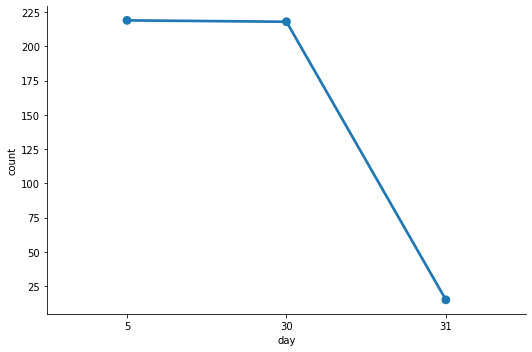

In [23]:
c = sns.catplot(x='day', y='count',
                data=daily_df,
                kind='point', height=5,
                aspect=1.5)

### Hourly - Request reponse network traffic 

In [24]:
# Count of calls per hour

from pyspark.sql.functions import col, count, date_format, date_sub, date_trunc, month, next_day, to_timestamp, weekofyear, window, year

def_mr = pd.get_option('max_rows')
pd.set_option('max_rows', 10)

hourly_df = (daily_traffic_df
                     .select(F.date_format('startTime','yyyy-MM-dd hh:mm:ss').alias('timestamp'))
                     .groupBy(window('timestamp', "15 minutes"))
                     .count())
# hourly_df= hourly_df.groupBy('startTime', window('startTime', "5 minutes")).sum("metric")

hourly_df = hourly_df.toPandas()
hourly_df

,window,count
0,"(2016-02-05 06:45:00, 2016-02-05 07:00:00)",219
1,"(2015-06-30 10:30:00, 2015-06-30 10:45:00)",218
2,"(2022-05-31 08:45:00, 2022-05-31 09:00:00)",4
3,"(2022-05-31 10:00:00, 2022-05-31 10:15:00)",1
4,"(2022-05-31 08:30:00, 2022-05-31 08:45:00)",3
5,"(2022-05-31 09:00:00, 2022-05-31 09:15:00)",1
6,"(2022-05-31 06:30:00, 2022-05-31 06:45:00)",2
7,"(2022-05-31 06:15:00, 2022-05-31 06:30:00)",4


In [25]:
window_start = hourly_df['window'].map(lambda r : Row(start =r[0]))
window_start= spark.createDataFrame(window_start).toPandas()
hourly_df["start"]=window_start
hourly_df.drop(columns=["window"], inplace=True)
hourly_df

,count,start
0,219,2016-02-05 06:45:00
1,218,2015-06-30 10:30:00
2,4,2022-05-31 08:45:00
3,1,2022-05-31 10:00:00
4,3,2022-05-31 08:30:00
5,1,2022-05-31 09:00:00
6,2,2022-05-31 06:30:00
7,4,2022-05-31 06:15:00


<Figure size 432x360 with 0 Axes>

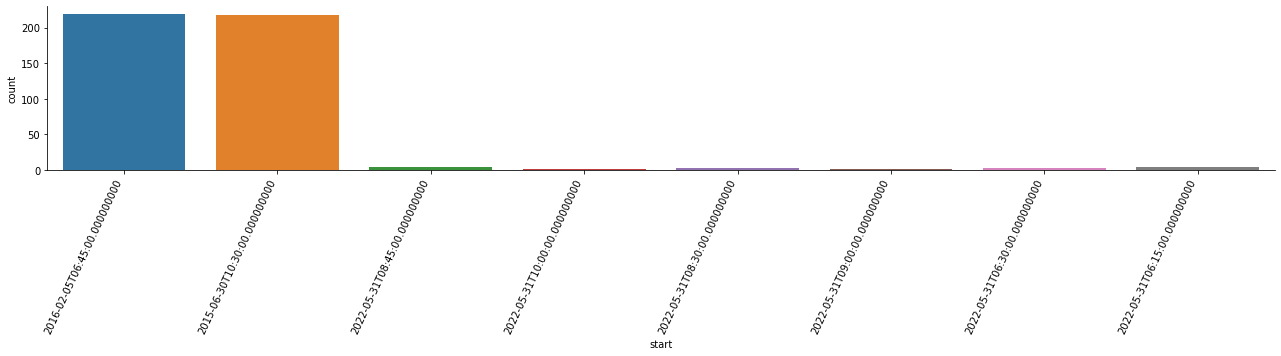

In [26]:
plt.figure(figsize=(6,5))
chart = sns.catplot(x='start', y='count',
                data=hourly_df,
                kind='bar', height=3, aspect=6)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Ref 
- http://www-mmsp.ece.mcgill.ca/Documents/AudioFormats/WAVE/Samples.html
-https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06